In [1]:
#Import dependants
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import us
from pathlib import Path
from datetime import datetime

(to find the full names of the states for shd_df, I had to import "us". To do this, type "pip install us" on a random cell, once installed, delete and then restart kernel to use)

# Data Cleaning
### Preparing for Analysis

In [2]:
# Load and read the CSV files
CSV1Kpath = Path("Resources/Kaggle1DS.csv")
CSV2Kpath = Path("Resources/Kaggle2DS.csv")
CSV3Xpath = Path("Resources/SHD.csv")
CSV1KR = pd.read_csv(CSV1Kpath)
CSV2KR = pd.read_csv(CSV2Kpath)
CSV3XR = pd.read_csv(CSV3Xpath)

In [3]:
#Data frames
kaggle_1_df = pd.DataFrame(CSV1KR)
kaggle_2_df = pd.DataFrame(CSV2KR)
shd_df = pd.DataFrame(CSV3XR)

### Cleaning Kaggle 1 df

#kaggle_1_df

In [4]:
# Organizing columns in desired order #update: took out address
clean_1_df = pd.DataFrame(kaggle_1_df[["school","type","year","date","time","city","state","urbanrural","race","killed","injured","victims","LONCOD","LATCOD"]])

# Convert "Date" column to datetime
clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])

# Format the 'Date' column for display
clean_1_df["date"] = clean_1_df["date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_1_df.rename(columns={"urbanrural": "City Type", "LONCOD": "Longitude","LATCOD": "Latitude"}, inplace=True)

# Proper case the columns
clean_1_df.columns = [col.title() if col.islower() else col for col in clean_1_df]

# Proper case the rows
clean_1_df = clean_1_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Replace NaN with "Unknown"
clean_1_df = clean_1_df.fillna("Unknown")


# Adding the newly labeled data into a new csv for cleanliness
clean_1_path = Path("Outputs/clean_1_final.csv")
clean_1_df.to_csv(clean_1_path, index=False)

clean_1_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10936\3454511816.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])


,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,William Penn High School,High School,2009,01/08/2009,8:30Pm,New Castle,Delaware,Suburbtown,Black,0,1,1,-75.5849,39.6681
1,Dunbar Vocational Career Academy,High School,2009,01/09/2009,8:00Pm,Chicago,Illinois,Urban,Black,0,5,5,-87.6175,41.8399
2,Cahokia High School,High School,2009,01/23/2009,7:20Pm,Cahokia,Illinois,Suburbtown,Black,1,0,1,-90.1651,38.5657
3,Zebulon Middle School,Middle School,2009,02/11/2009,6:00Am,Zebulon,North Carolina,Suburbtown,Black,0,1,1,-78.3118,35.8315
4,Central High School,High School,2009,02/17/2009,2:20Pm,Detroit,Michigan,Urban,Unknown,0,1,1,-83.113977,42.383593


In [5]:
# Load the dataset as a DataFrame
clean_2_df = pd.DataFrame(kaggle_2_df)

# Added a "Victims" column to match other datasets for easier merging
clean_2_df["Victims"] = clean_2_df["killed"] + clean_2_df["injured"]

# Organizing available columns in desired order
reorganized_clean_2_df = clean_2_df[["school","year","date","time","city","state","killed","injured", "Victims", "long","lat","weapon",
                                       "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"]]

# Convert "Date" column to datetime
reorganized_clean_2_df["date"] = pd.to_datetime(reorganized_clean_2_df["date"])

# Format the 'Date' column for display
reorganized_clean_2_df["date"] = reorganized_clean_2_df["date"].dt.strftime("%m/%d/%Y")

# Renaming the columns
reorganized_clean_2_df.rename(columns={"long": "Longitude","lat": "Latitude","weapon_source":"Weapon Source", "age_shooter1":"Age",
                           "race_ethnicity_shooter1":"Race",}, inplace=True)

# Proper case the columns
reorganized_clean_2_df.columns = [col.title() if col.islower() else col for col in reorganized_clean_2_df]

# Proper case the rows
reorganized_clean_2_df = reorganized_clean_2_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Extract school type from the 'School' column and put it in the 'Type' column
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
reorganized_clean_2_df.loc[reorganized_clean_2_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Rearranging new columns and the first dataframe into desired order
reorganized_clean_2_df = pd.DataFrame(reorganized_clean_2_df[["School","Type","Year","Date","Time","City","State","Race","Killed","Injured", "Victims",
                                     "Longitude","Latitude",
                                      "Weapon","Weapon Source","Age","Gender_Shooter1","Shooter_Relationship1"]])

# Replace NaN with "Unknown"
reorganized_clean_2_df = reorganized_clean_2_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_2_path = Path("Outputs/clean_2_final.csv")
reorganized_clean_2_df.to_csv(clean_2_path, index=False)

reorganized_clean_2_df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_10936\3750166570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorganized_clean_2_df["date"] = pd.to_datetime(reorganized_clean_2_df["date"])
C:\Users\user\AppData\Local\Temp\ipykernel_10936\3750166570.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorganized_clean_2_df["date"] = reorganized_clean_2_df["date"].dt.strftime("%m/%d/%Y")
C:\Users\user\AppData\Local\Temp\ipykernel_10936\3750166570.py:18: SettingWithCopyWarning: 
A value is trying to be se

,School,Type,Year,Date,Time,City,State,Race,Killed,Injured,Victims,Longitude,Latitude,Weapon,Weapon Source,Age,Gender_Shooter1,Shooter_Relationship1
0,Columbine High School,High School,1999,04/20/1999,11:19 Am,Littleton,Colorado,W,13,21,34,-105.075,39.60391,12-Gauge Savage-Springfield 67H Pump-Action Sh...,Purchased From Friends,18.0,M,Student
1,Scotlandville Middle School,Middle School,1999,04/22/1999,12:30 Pm,Baton Rouge,Louisiana,Unknown,0,1,1,-91.169966,30.529958,.22 Caliber Pistol,Unknown,14.0,M,Former Student (Expelled)
2,Heritage High School,High School,1999,05/20/1999,8:03 Am,Conyers,Georgia,W,0,6,6,-84.04796,33.626922,".22 Caliber Rifle, 357-Caliber Magnum Handgun",Unknown,15.0,M,Student
3,John Bartram High School,High School,1999,10/04/1999,10:00 Am,Philadelphia,Pennsylvania,Unknown,0,1,1,-75.234108,39.921509,Rg .25-Caliber Pistol,Purchased From Friend,17.0,M,Student
4,Dorchester High School,High School,1999,11/03/1999,7:40 Am,Boston,Massachusetts,Unknown,0,1,1,-71.075901,42.285268,Unknown,Unknown,Unknown,M,Unknown


### Cleaning shd_df

In [6]:
# Organizing available columns in desired order
clean_3_df = pd.DataFrame(shd_df[["school","School_Level","Date","City","State","First_Shot","Bullied","Domestic_Violence","Gang_Related","Preplanned","Quarter","Location"]])

# Convert "Date" column to datetime
clean_3_df["Date"] = pd.to_datetime(clean_3_df["Date"])

# Create the "Year" column by extracting the year from the "Date" column
clean_3_df['Year'] = clean_3_df['Date'].dt.year

# Format the 'Date' column for display
clean_3_df["Date"] = clean_3_df["Date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_3_df.rename(columns={"school":"School", "School_Level": "Type","First_Shot": "Time"}, inplace=True)

# Proper case the columns
clean_3_df.columns = [col.title() if col.islower() else col for col in clean_3_df]

#"weapon", "weapon_source","age_shooter1","gender_shooter1","race_ethnicity_shooter1","shooter_relationship1"

# Extract school type from the 'School' column and put it in the 'Type' column
clean_3_df.loc[clean_3_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_3_df.loc[clean_3_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_3_df.loc[clean_3_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_3_df.loc[clean_3_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Map state abbreviations to full state names using us package
def get_full_state_name(abbrev):
    try:
        return us.states.lookup(abbrev).name
    except AttributeError:
        return abbrev

clean_3_df["State"] = clean_3_df["State"].apply(get_full_state_name)

# Rearranging new columns and the first dataframe into desired order
clean_3_df = pd.DataFrame(clean_3_df[["School","Type","Date","City","State","Time","Bullied","Domestic_Violence","Gang_Related","Preplanned","Quarter","Location"]])

# Replace NaN with "Unknown"
clean_3_df = clean_3_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_3_path = Path("Outputs/clean_3_final.csv")
clean_3_df.to_csv(clean_3_path, index=False)

clean_3_df.head()

,School,Type,Date,City,State,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Hine Junior High School,Middle School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Inside School Building
1,Sousa Junior High,Middle School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Hallway
2,Unnamed High School,High School,01/05/1970,Washington,DC,Unknown,No,No,No,No,Winter,Playground
3,John F. Kennedy High School,High School,02/06/1970,Cleveland,Ohio,Unknown,No,No,No,No,Winter,Hallway
4,David Starr Jordan High School,High School,03/23/1970,Long Beach,California,Unknown,No,No,No,No,Spring,Beside Building


### Merging Data Frames

drop: "Type_x","Year_x","Date_x","Time_x","City_x","State_x"

In [7]:
# Merging First dfs
merged_df = pd.merge(clean_1_df, reorganized_clean_2_df, on=["School","Race", "Killed", "Injured", "Victims", "Longitude", "Latitude"], how="right") 
clean_merge_df = merged_df.drop(["Type_x","Year_x","Date_x","Time_x","City_x","State_x"],axis = 1)

# Renaming City for final merge
clean_merge_df.rename(columns={"City_y": "City","Type_y": "Type","Year_y":"Year","Date_y":"Date","Time_y":"Time","State_y":"State"}, inplace=True)

clean_merge_df.columns

Index(['School', 'City Type', 'Race', 'Killed', 'Injured', 'Victims',
       'Longitude', 'Latitude', 'Type', 'Year', 'Date', 'Time', 'City',
       'State', 'Weapon', 'Weapon Source', 'Age', 'Gender_Shooter1',
       'Shooter_Relationship1'],
      dtype='object')

drop: "City Type", "Victims","Type_x","Date_x","State_y","Time_x"

In [8]:
# Final Merge
final_df = pd.merge(clean_merge_df, clean_3_df, on=["School","City"])
final_df_merged = final_df.drop(["City Type","Type_x","Date_x","State_y","Time_x"],axis = 1)

# Renaming City for final merge
final_df_merged.rename(columns={"Type_y": "Type","Date_y": "Date","Time_y":"Time","State_x":"State"}, inplace=True)

# Dropping duplicates in our final DataFrame
clean_final_merged = final_df_merged.drop_duplicates(subset="Date")

# Adding the newly labeled data into a new CSV for easier access and analysis
final_path = Path("Outputs/clean_final_merge.csv")
clean_final_merged.to_csv(final_path, index=False)

# Display Final Dataframe
clean_final_merged.head()

,School,Race,Killed,Injured,Victims,Longitude,Latitude,Year,City,State,...,Shooter_Relationship1,Type,Date,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Columbine High School,W,13,21,34,-105.075,39.60391,1999,Littleton,Colorado,...,Student,High School,04/20/1999,11:19 AM,Yes,No,No,Yes,Spring,Cafeteria
1,Scotlandville Middle School,Unknown,0,1,1,-91.169966,30.529958,1999,Baton Rouge,Louisiana,...,Former Student (Expelled),Middle School,04/22/1999,12:30 PM,No,No,No,No,Spring,Beside Building
2,Heritage High School,W,0,6,6,-84.04796,33.626922,1999,Conyers,Georgia,...,Student,High School,05/20/1999,8:03 AM,No,No,No,Yes,Spring,Hallway
3,Deming Middle School,H,1,0,1,-107.762986,32.261547,1999,Deming,New Mexico,...,Student,Middle School,11/19/1999,12:45 PM,No,No,No,No,Fall,Outside on School Property
4,Fort Gibson Middle School,Ai,0,5,5,-95.241921,35.795556,1999,Fort Gibson,Oklahoma,...,Student,Middle School,12/06/1999,7:45 AM,No,No,No,No,Winter,Front of School


In [9]:
import hvplot.pandas

In [10]:
# Load "Final_Data.csv" to be used to generate plot
clean_final_merge = pd.read_csv("Resources/clean_final_merge.csv")

# Display the data to make sure the relative paths are working
clean_final_merge.head()

,School,Race,Killed,Injured,Victims,Longitude,Latitude,Year,City,State,...,Shooter_Relationship1,Type,Date,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location
0,Columbine High School,W,13,21,34,-105.075000,39.603910,1999,Littleton,Colorado,...,Student,High School,04/20/1999,11:19 AM,Yes,No,No,Yes,Spring,Cafeteria
1,Scotlandville Middle School,Unknown,0,1,1,-91.169966,30.529958,1999,Baton Rouge,Louisiana,...,Former Student (Expelled),Middle School,04/22/1999,12:30 PM,No,No,No,No,Spring,Beside Building
2,Heritage High School,W,0,6,6,-84.047960,33.626922,1999,Conyers,Georgia,...,Student,High School,05/20/1999,8:03 AM,No,No,No,Yes,Spring,Hallway
3,Deming Middle School,H,1,0,1,-107.762986,32.261547,1999,Deming,New Mexico,...,Student,Middle School,11/19/1999,12:45 PM,No,No,No,No,Fall,Outside on School Property
4,Fort Gibson Middle School,Ai,0,5,5,-95.241921,35.795556,1999,Fort Gibson,Oklahoma,...,Student,Middle School,12/06/1999,7:45 AM,No,No,No,No,Winter,Front of School


In [11]:
%%capture --no-display

# Creating test map prior to merging DataFrames
map_plot_1 = clean_final_merged.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = True,
    frame_width = 800,
    frame_height = 600,
    color = "City",
    size = "Victims",
    hover_cols = ["Killed", "Date", "State", "School"],
    alpha = 0.8,
    scale = 7
)

map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (City,Victims,Killed,Date,State,School)

Needed to: pip install selenium

conda install -c conda-forge firefox geckodriver

In [12]:
# Save the plot as a PNG
hvplot.save(map_plot_1, 'Outputs/school_shooting_plot.png')

# Analyzing the Data


In [13]:
# Annual analysis of # of incidents by year
year_school_df = clean_final_merge.groupby("Year")

#Count of incidents per year
count_year_incident = year_school_df['Year'].count()

count_year_incident

Year
1999     5
2000    10
2001    12
2002     6
2003     9
2004     9
2005    15
2006    15
2007     6
2008     9
2009    12
2010     9
2011     4
2012    10
2013    12
2014    13
2015     5
2016    10
2017    14
2018    24
2019    20
2020     5
2021    29
2022    22
2023     7
Name: Year, dtype: int64

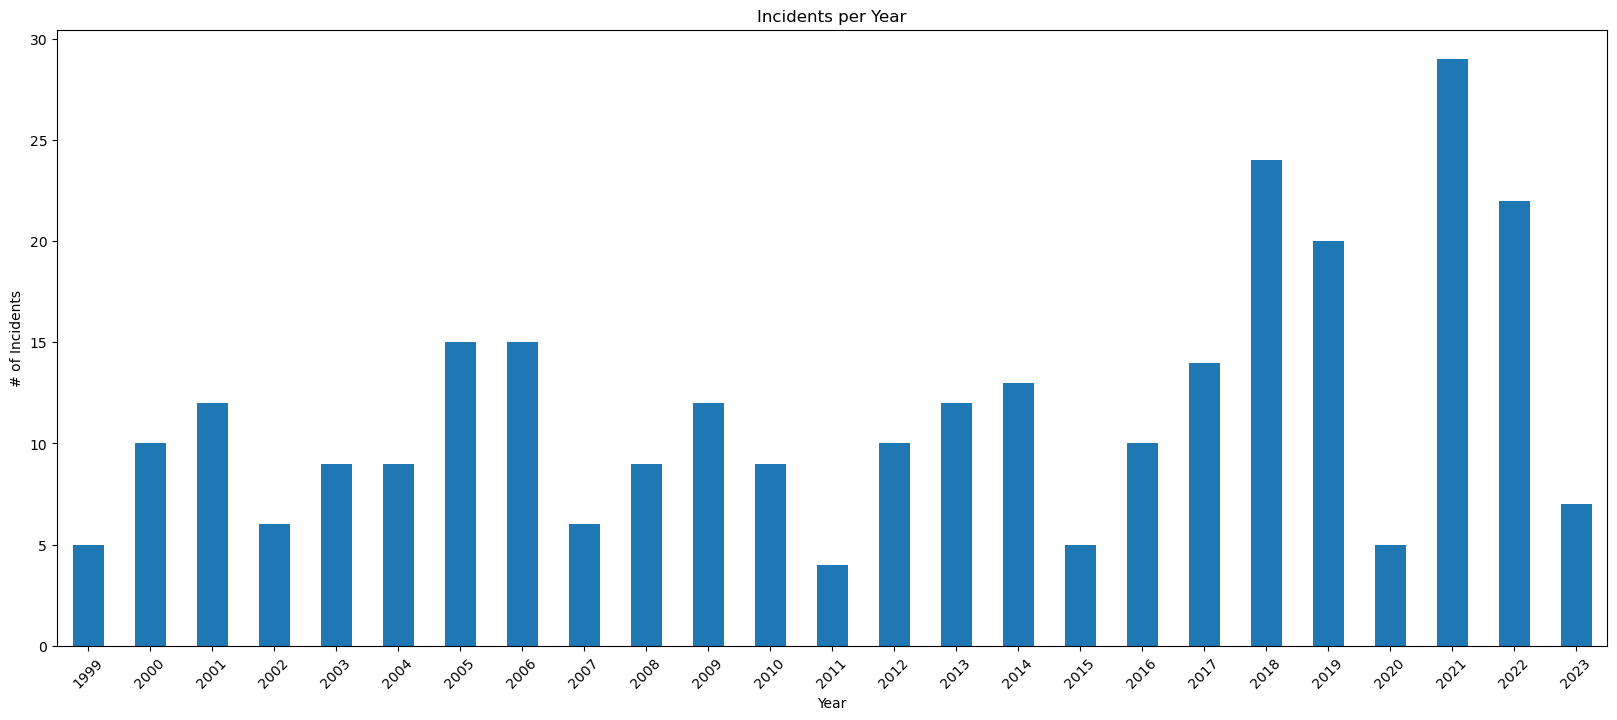

In [15]:
# Create a bar chart
annual_chart = count_year_incident.plot(kind="bar", figsize=(20,8))

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("# of Incidents")
plt.title("Incidents per Year")

#save as png
plt.savefig('Outputs/map_plot_7.png')

#plot
plt.show()

# Incident Analysis: Analyzing data by school type, time of day, location


__Incidents by school types analysis__


In [16]:
# school type analysis of # of incidents 
school_type_df = clean_final_merge.groupby("Type")

#Count of incidents per year
count_type_incident = school_type_df['Type'].count()

count_type_incident

Type
6-12                   3
Elementary             3
Elementary School     29
High                   7
High School          203
K-12                   4
K-8                    2
Middle                 2
Middle School         35
Other                  4
Name: Type, dtype: int64

In [17]:
#create sets of school types data
Types_data = {
    'Type': ['6-12', 'Elementary', 'Elementary School', 'High', 'High School', 
             'K-12', 'K-8', 'Middle', 'Middle School', 'Other'],
    'Count': [3, 3, 29, 7, 169, 4, 3, 2, 33, 4]
}

Types_df = pd.DataFrame(Types_data)
Types_df

,Type,Count
0,6-12,3
1,Elementary,3
2,Elementary School,29
3,High,7
4,High School,169
5,K-12,4
6,K-8,3
7,Middle,2
8,Middle School,33
9,Other,4


In [18]:
#Map types to categories
category_mapping = {
    'Elementary': 'Elementary School',
    'Elementary School': 'Elementary School',
    'Middle': 'Middle School',
    'Middle School': 'Middle School',
    'High': 'High School',
    'High School': 'High School',
    'K-12': 'K-12',
    '6-12': '6-12',
    'K-8': 'K-8',
    'Other': 'Other'
}

#Map the types to categories
Types_df['Category'] = Types_df['Type'].map(category_mapping)

#Groupby categories & display counts
Types_results = Types_df.groupby('Category')['Count'].sum().reset_index()

Types_results

,Category,Count
0,6-12,3
1,Elementary School,32
2,High School,176
3,K-12,4
4,K-8,3
5,Middle School,35
6,Other,4


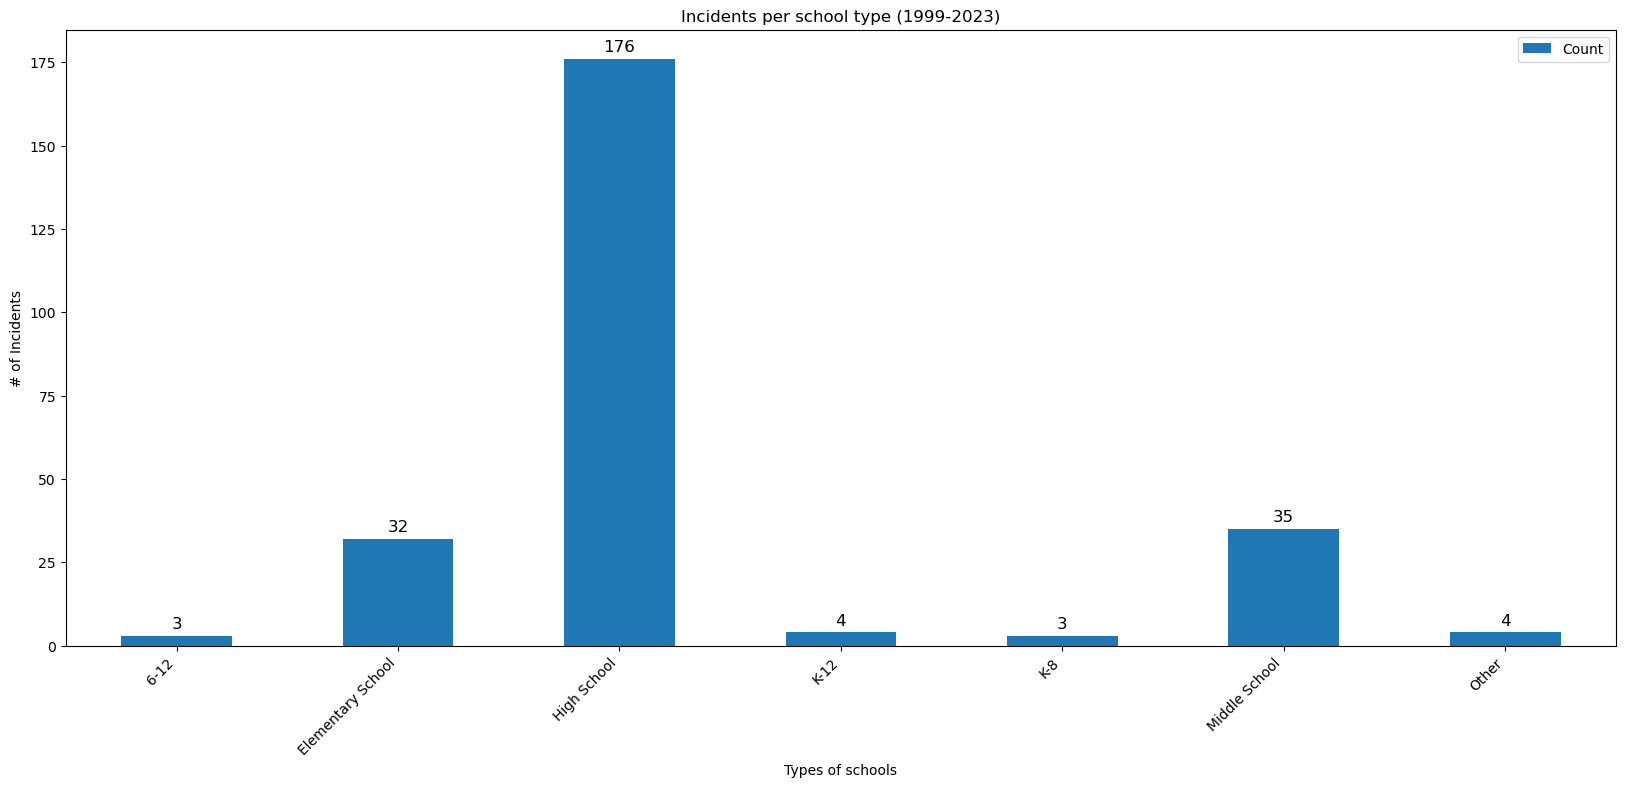

In [19]:
#set 'category' as index for plotting
Types_results.set_index('Category', inplace=True)

# Create a bar chart
ax = Types_results.plot(kind="bar", figsize=(20,8))

#annotate bars with values
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel("Types of schools")
plt.ylabel("# of Incidents")
plt.title("Incidents per school type (1999-2023)")

#save as png
plt.savefig('Outputs/map_plot_6.png')

#plot
plt.show()

__Time of Incident Analysis__

In [20]:
# school type analysis of # of incidents 
school_time_df = clean_final_merge.groupby("Time")

#Count of incidents per year
count_time_incident = school_time_df['Time'].count()

clean_final_merge['Time'].unique()

array(['11:19 AM', '12:30 PM', '8:03 AM', '12:45 PM', '7:45 AM',
       '3:00 PM', '8:34 AM', '12:00 PM', '1:30 PM', '10:30 AM', 'Unknown',
       '11:50 AM', '12:50 PM', '8:45 AM', '1:00 PM', '9:20 AM',
       '12:54 PM', '8:15 AM', '7:20 AM', '7:25 AM', '10:00 AM', '2:40 PM',
       '2:50 PM', '10:40 AM', '8:09 AM', '8:30 AM', '3:20 PM', '12:40 PM',
       '8:40 AM', '12:15 PM', '7:34 AM', '2:30 PM', '11:38 AM', '8:00 AM',
       '9:00 AM', '11:45 AM', '12:22 PM', '12:09 PM', '4:00 PM',
       '2:32 PM', '2:00 PM', '9:15 AM', '2:20 PM', '11:30 PM', '1:25 PM',
       '10:50 AM', '9:30 AM', '11:00 AM', '9:45 AM', '3:10 PM', '1:20 PM',
       '11:40:00', '8:10 AM', '7:30 AM', '10:45 AM', '8:25 AM',
       '10:57 AM', '2:15 PM', '10:02 AM', '5:00 PM', '11:54 AM',
       '08:11:00', '9:00 PM', '8:20 AM', '7:22 AM', '8:05 AM', '1:53 PM',
       '1:55 PM', '11:00 PM', '1:45 PM', '15:14:00', '7:51 AM', '9:16 AM',
       '7:53 AM', '7:30 PM', '10:37 AM', '9:45 PM', '10:20:00',
       '13:30:0

In [21]:
#Reformat the times to all be the same format
# Iterate over each row and update the 'Time' column
for index, value in clean_final_merge['Time'].items():
    if value != 'Unknown':
        clean_final_merge.loc[index, 'Time'] = pd.Timestamp(value).strftime('%I:%M %p')

In [22]:
# Convert 'Time' column to datetime format, handling 'Unknown' values
clean_final_merge['Time'] = pd.to_datetime(clean_final_merge['Time'], errors='coerce')

# Define the labels for the time bins
labels = ['Morning', 'Afternoon', 'Evening']

# Function to categorize time into bins
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour <= 23:
        return 'Evening'
    else:
        return 'Unknown'

# Extract hour from 'Time' column
clean_final_merge['Hour'] = clean_final_merge['Time'].dt.hour

# Apply categorization function to create 'Time_Bin' column
clean_final_merge['Time_Bin'] = clean_final_merge['Hour'].apply(categorize_time)

# Drop 'Hour' column if not needed
clean_final_merge.drop(columns=['Hour'], inplace=True)

# Fill NaN values in 'Time_Bin' column with 'Unknown'
clean_final_merge['Time_Bin'] = clean_final_merge['Time_Bin'].fillna('Unknown')

clean_final_merge

/var/folders/rz/6tnzmsj50s75hgrnq67ygmm00000gn/T/ipykernel_38633/814358060.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_final_merge['Time'] = pd.to_datetime(clean_final_merge['Time'], errors='coerce')


,School,Race,Killed,Injured,Victims,Longitude,Latitude,Year,City,State,...,Type,Date,Time,Bullied,Domestic_Violence,Gang_Related,Preplanned,Quarter,Location,Time_Bin
0,Columbine High School,W,13,21,34,-105.075000,39.603910,1999,Littleton,Colorado,...,High School,04/20/1999,2024-05-16 11:19:00,Yes,No,No,Yes,Spring,Cafeteria,Morning
1,Scotlandville Middle School,Unknown,0,1,1,-91.169966,30.529958,1999,Baton Rouge,Louisiana,...,Middle School,04/22/1999,2024-05-16 12:30:00,No,No,No,No,Spring,Beside Building,Afternoon
2,Heritage High School,W,0,6,6,-84.047960,33.626922,1999,Conyers,Georgia,...,High School,05/20/1999,2024-05-16 08:03:00,No,No,No,Yes,Spring,Hallway,Morning
3,Deming Middle School,H,1,0,1,-107.762986,32.261547,1999,Deming,New Mexico,...,Middle School,11/19/1999,2024-05-16 12:45:00,No,No,No,No,Fall,Outside on School Property,Afternoon
4,Fort Gibson Middle School,Ai,0,5,5,-95.241921,35.795556,1999,Fort Gibson,Oklahoma,...,Middle School,12/06/1999,2024-05-16 07:45:00,No,No,No,No,Winter,Front of School,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,William Penn High School,Unknown,0,0,0,-75.584879,39.668622,2023,New Castle,Delaware,...,High School,01/08/2009,2024-05-16 20:30:00,No,No,No,No,Winter,Gym,Evening
288,Taylorsville High School,Unknown,0,0,0,-111.936978,40.655508,2023,Taylorsville,Utah,...,High School,10/12/2001,NaT,No,No,No,No,Fall,Hallway,Unknown
289,Palo Duro High School,Unknown,0,1,1,-101.824434,35.228498,2023,Amarillo,Texas,...,High School,09/11/1992,2024-05-16 10:00:00,No,No,No,No,Fall,Hallway,Morning
290,Anniston High School,Unknown,0,1,1,-85.820000,33.661200,2023,Anniston,Alabama,...,High School,04/30/1982,2024-05-16 07:25:00,No,No,No,No,Spring,Parking Lot,Morning


In [23]:
# school type analysis of # of incidents 
school_time_df = clean_final_merge.groupby("Time_Bin")

#Count of incidents per year
count_time_incident = school_time_df['Time_Bin'].count()

count_time_incident

Time_Bin
Afternoon    119
Evening       17
Morning      134
Unknown       22
Name: Time_Bin, dtype: int64

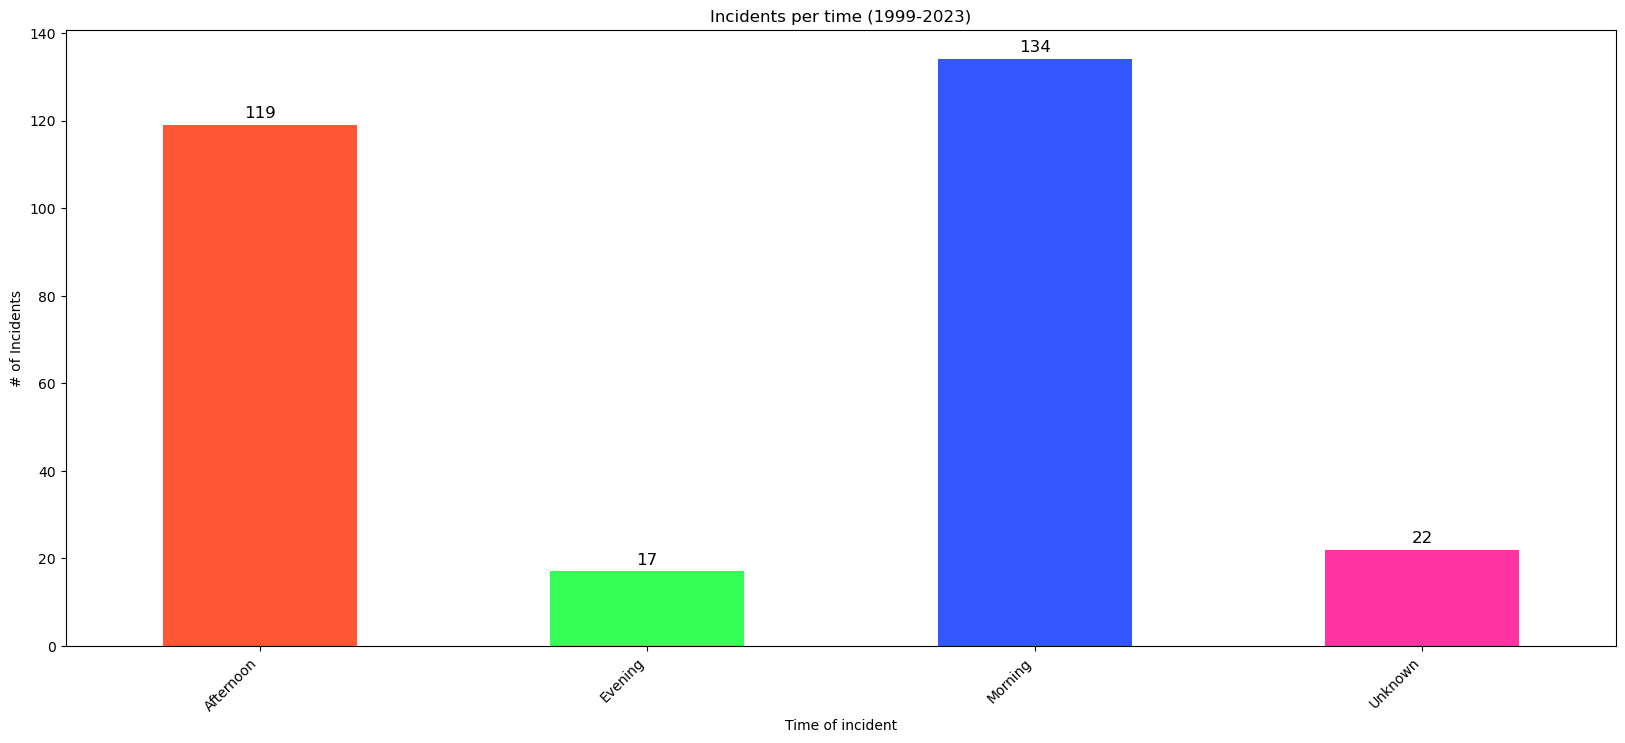

In [24]:
#create colors for graph 
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1']

# Create a bar chart
ax = count_time_incident.plot(kind="bar", figsize=(20,8), color=colors[:len(count_time_incident)])

#annotate bars with values
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel("Time of incident")
plt.ylabel("# of Incidents")
plt.title("Incidents per time (1999-2023)")

#save as png
plt.savefig('Outputs/map_plot_5.png')

#plot
plt.show()

**Types of weapons used**

In [25]:
clean_final_merge['Weapon'].unique()

array(['12-Gauge Savage-Springfield 67H Pump-Action Shotgun, Hi-Point 995 Carbine 9 Mm Carbine, 9_19Mm Intratec Tec-9 Semi-Automatic Handgun, 12-Gauge Stevens 311D Double-Barreled Sawed-Off Shotgun',
       '.22 Caliber Pistol',
       '.22 Caliber Rifle, 357-Caliber Magnum Handgun',
       '.22-Caliber Colt Revolver', 'Taurus 9Mm Pistol',
       '.22-Caliber Magnum Handgun', '.22 Caliber Revolver', 'Unknown',
       'Small-Caliber Pistol', '.25-Caliber Handgun',
       '.22-Caliber Handgun', '.380-Caliber Semiautomatic Handgun',
       '.38-Caliber Revolver', 'Handgun', '.32-Caliber Handgun',
       '.22-Caliber Revolver', 'Mossberg Pump-Action 12-Gauge Shotgun',
       'Pistol', '.380 Caliber Semi-Automatic Pistol',
       '.357 Magnum Pistol', 'Revolver',
       '.380-Caliber Semiautomatic Pistol', '.38-Caliber Handgun',
       '20-Guage Shotgun', 'Bushmaster Xm-15 Rifle',
       'Browning .380-Caliber Pistol', 'Small Semi-Automatic Handgun',
       '.44-Caliber Handgun, .22-Caliber

In [26]:
#Create bins for general weapon categories to iterate through weapon names in dataframe
# Define binning rules
binning_rules = {
    'Shotgun': ['Shotgun', 'Pump-Action Shotgun', 'Double-Barreled Sawed-Off Shotgun'],
    'Pistol': ['Pistol', 'Handgun', 'Revolver', 'Glock'],
    'Rifle': ['Rifle', 'Assault Rifle', 'Hunting Rifle'],
    'Unknown': ['Unknown']
}

# Create an empty column for the weapon category
clean_final_merge['Weapon_Category'] = 'Other'

# Loop through each row and apply binning rules
for index, row in clean_final_merge.iterrows():
    weapon = row['Weapon']
    for category, keywords in binning_rules.items():
        for keyword in keywords:
            if keyword.lower() in weapon.lower():
                clean_final_merge.loc[index, 'Weapon_Category'] = category
                break

clean_final_merge[['Weapon_Category', 'Weapon']]

,Weapon_Category,Weapon
0,Pistol,12-Gauge Savage-Springfield 67H Pump-Action Sh...
1,Pistol,.22 Caliber Pistol
2,Rifle,".22 Caliber Rifle, 357-Caliber Magnum Handgun"
3,Pistol,.22-Caliber Colt Revolver
4,Pistol,Taurus 9Mm Pistol
...,...,...
287,Pistol,Handgun
288,Unknown,Unknown
289,Unknown,Unknown
290,Unknown,Unknown


In [27]:
#Obtain a value counts of weapon category
# school type analysis of # of incidents 
school_weapon_df = clean_final_merge.groupby("Weapon_Category")

#Count of incidents per year
count_weapon = school_weapon_df['Weapon_Category'].count()

count_weapon

Weapon_Category
Other       11
Pistol     173
Rifle       16
Shotgun     10
Unknown     82
Name: Weapon_Category, dtype: int64

In [28]:
#make count_shooter_gender a dataframe to display f strings
gun_category_df = pd.DataFrame(count_weapon)

#rename column to incident counts
gun_category_df.columns= ['Incident_count']

gun_category_df

,Incident_count
Weapon_Category,
Other,11
Pistol,173
Rifle,16
Shotgun,10
Unknown,82


In [29]:
#pulling values from dataframe for f strings
other_count = gun_category_df.loc['Other', 'Incident_count']
pistol_count = gun_category_df.loc['Pistol', 'Incident_count']
rifle_count = gun_category_df.loc['Rifle', 'Incident_count']
shotgun_count = gun_category_df.loc['Shotgun', 'Incident_count']
unknowng_count = gun_category_df.loc['Unknown', 'Incident_count']

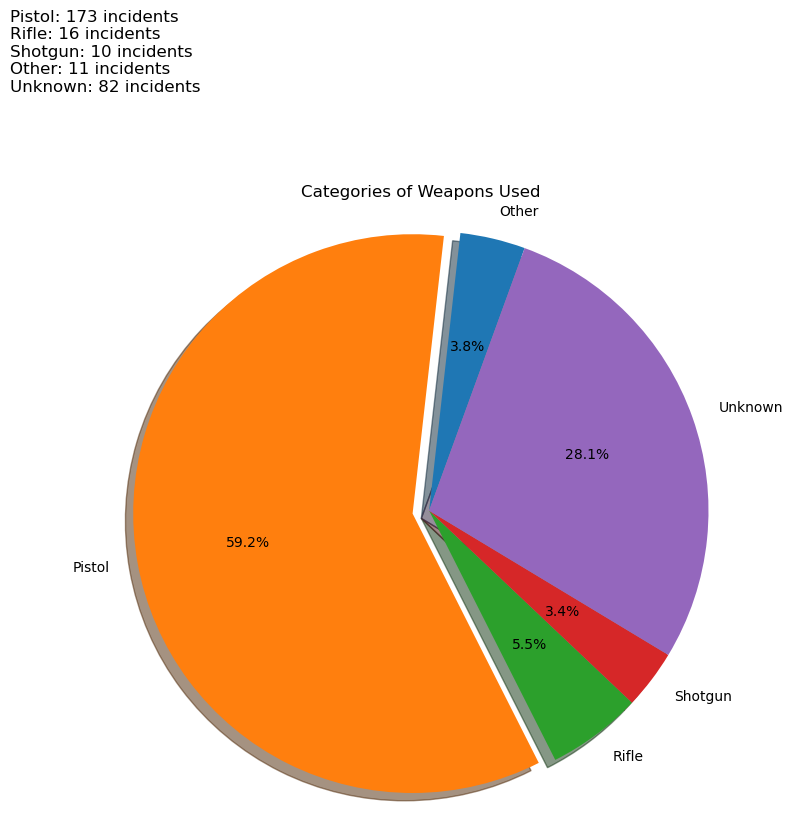

In [31]:
#plot pie chart
explode = [0.06 if category == 'Pistol' else 0 for category in count_weapon.index]

plt.figure(figsize= (8,8))
plt.pie(count_weapon, labels=count_weapon.index, autopct='%1.1f%%', startangle=70, 
        explode=explode, shadow=True)
plt.title('Categories of Weapons Used')
plt.axis('equal')

#add f-string annotation 
plt.text(-1.5, 1.5, f"Pistol: {pistol_count} incidents\nRifle: {rifle_count} incidents\nShotgun: {shotgun_count} incidents\nOther: {other_count} incidents\nUnknown: {unknowng_count} incidents", fontsize=12, color='black')

#save as png
plt.savefig('Outputs/map_plot_4.png')

#plot
plt.show()

# Pepetrator Demographics: Traits, Warning Signs/Risk Factors of perpetrator

**Create a bar graph for age**

In [32]:
#clean_final_merge['Age']
# Convert 'unknown' strings to NaN
clean_final_merge['Age'] = pd.to_numeric(clean_final_merge['Age'], errors='coerce')
#clean_final_merge['Age']

#conduct a groupby
grouped_age = clean_final_merge.groupby('Age')

counted_age = grouped_age['Age'].count()

counted_age

Age
7.0      1
8.0      2
9.0      1
11.0     2
12.0     5
13.0    11
14.0    24
15.0    43
16.0    34
17.0    24
18.0    18
19.0    11
20.0     3
21.0     6
22.0     2
23.0     2
24.0     1
25.0     2
26.0     2
27.0     1
28.0     7
29.0     1
30.0     2
32.0     1
33.0     1
34.0     1
38.0     2
39.0     1
41.0     2
44.0     1
45.0     2
47.0     2
49.0     1
50.0     1
53.0     3
55.0     1
72.0     1
Name: Age, dtype: int64

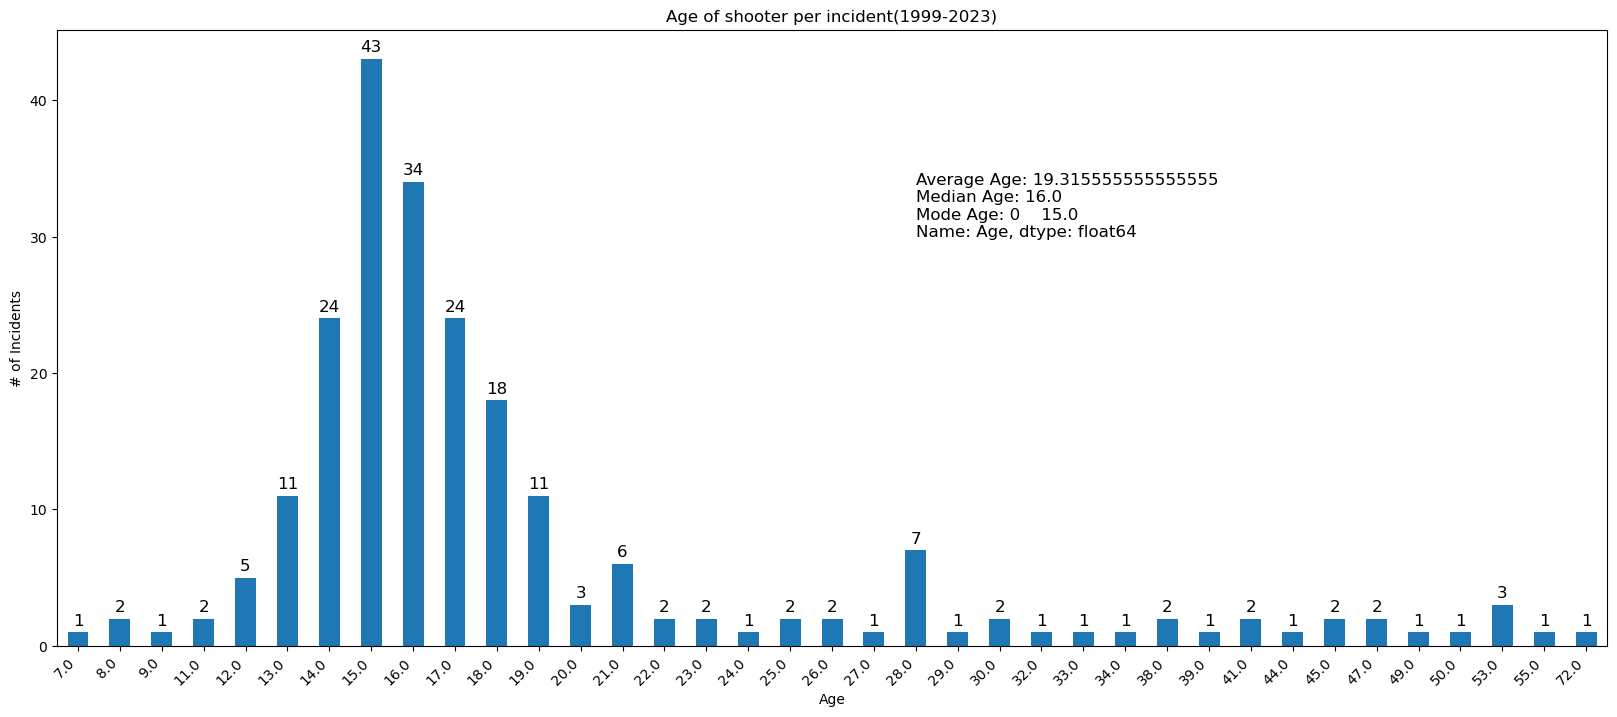

In [33]:
# Create a bar chart
ax = counted_age.plot(kind="bar", figsize=(20,8))

#annotate bars with values
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel("Age")
plt.ylabel("# of Incidents")
plt.title("Age of shooter per incident(1999-2023)")

#calculate statistics
#drop unknown
#Drop counts for 'Unknown'
# Convert 'unknown' strings to NaN
clean_final_merge['Age'] = pd.to_numeric(clean_final_merge['Age'], errors='coerce')

# Calculate the mean age
mean_age = clean_final_merge['Age'].mean()
median_age = clean_final_merge['Age'].median()
mode_age = clean_final_merge['Age'].mode()

#add f-string annotation 
plt.text(20, 30, f"Average Age: {mean_age}\nMedian Age: {median_age}\nMode Age: {mode_age}", fontsize=12, color='black')

#print mean, median, & mode beneath graph
#print(f'Average Age: {mean_age}')
#print(f'Median Age: {median_age}')
#print(f'Mode Age: {mode_age}')

#save as png
plt.savefig('Outputs/map_plot_9.png')

#plot
plt.show()

**Create a pie plot for gender of shooter & a line graph for gender of shooter over time**


In [34]:
#group original df by shooter gender
shooter_gender_df = clean_final_merge.groupby("Gender_Shooter1")

#Count of incidents per year
count_shooter_gender = shooter_gender_df['Gender_Shooter1'].count()

#Drop counts for 'H'
count_shooter_gender = count_shooter_gender.drop('H', errors='ignore')

count_shooter_gender

Gender_Shooter1
F           12
M          236
Unknown     43
Name: Gender_Shooter1, dtype: int64

In [35]:
#make count_shooter_gender a dataframe to display f strings
cs_sh = pd.DataFrame(count_shooter_gender)

#rename column to incident counts
cs_sh.columns= ['Incident_count']

cs_sh

,Incident_count
Gender_Shooter1,
F,12
M,236
Unknown,43


In [36]:
#pulling values from dataframe for f strings
male_count = cs_sh.loc['M', 'Incident_count']
female_count = cs_sh.loc['F', 'Incident_count']
unknown_count = cs_sh.loc['Unknown', 'Incident_count']

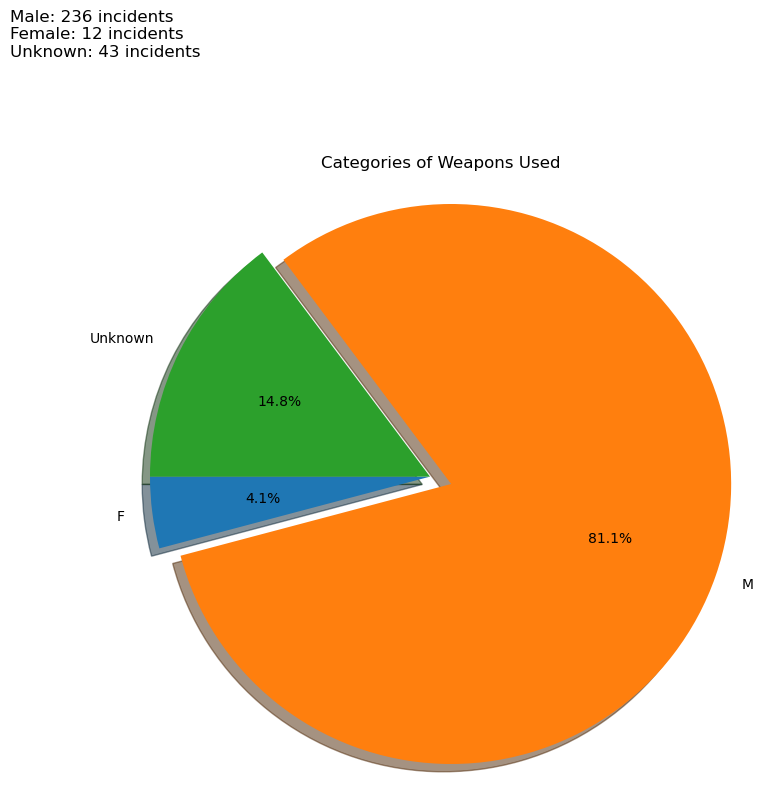

In [37]:
#create pie plot
explode = [0.08 if category == 'M' else 0 for category in count_shooter_gender.index]

plt.figure(figsize= (8,8))
plt.pie(count_shooter_gender, labels=count_shooter_gender.index, autopct='%1.1f%%', startangle=180, 
        explode=explode, shadow=True)
plt.title('Categories of Weapons Used')
plt.axis('equal')

#add f-string annotation 
plt.text(-1.5, 1.5, f"Male: {male_count} incidents\nFemale: {female_count} incidents\nUnknown: {unknown_count} incidents", fontsize=12, color='black')

plt.savefig('Outputs/map_plot_3.png')

#plot
plt.show()

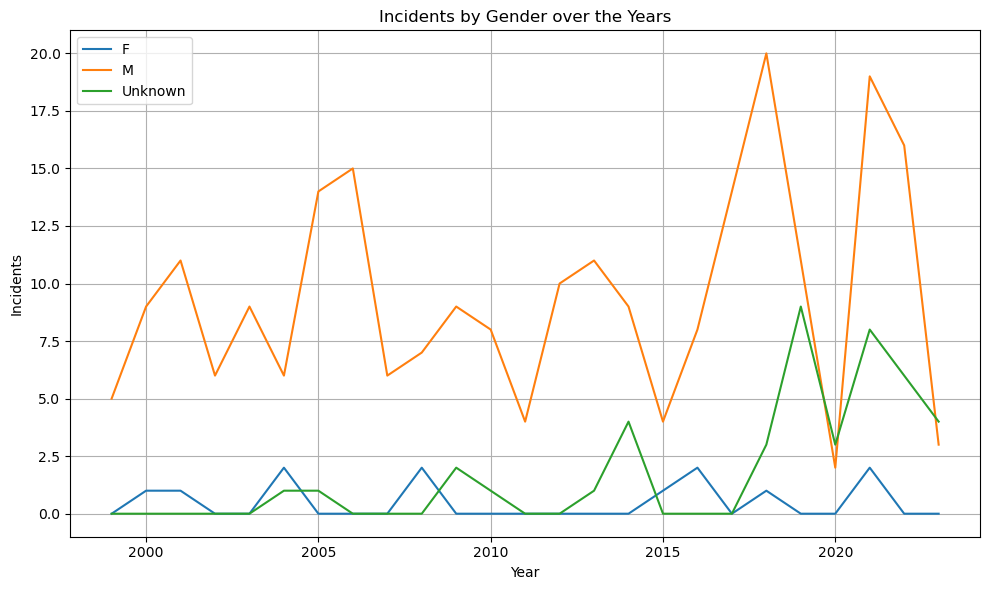

In [38]:
#Filter the DataFrame to exclude rows where shooter_gender is 'H'
filtered_df = clean_final_merge[clean_final_merge['Gender_Shooter1'] != 'H']

# Grouping the filtered data by 'shooter_gender' and 'year' and counting the incidents
gender_year_counts = filtered_df.groupby(['Gender_Shooter1', 'Year']).size().unstack(fill_value=0)

# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
for gender in gender_year_counts.index:
    plt.plot(gender_year_counts.columns, gender_year_counts.loc[gender], label=gender)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.title('Incidents by Gender over the Years')
plt.legend()

# Display the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.savefig('Outputs/map_plot_2.png')

#plot
plt.show()

In [39]:
clean_final_merge[['Bullied', 'Domestic_Violence']]

,Bullied,Domestic_Violence
0,Yes,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
287,No,No
288,No,No
289,No,No
290,No,No


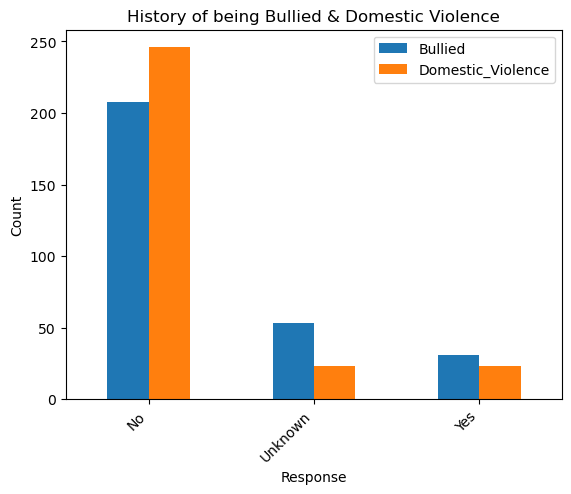

In [41]:
# Counting the occurrences of 'yes' and 'no' for each column
bullied_counts = clean_final_merge['Bullied'].value_counts()
domestic_violence_counts = clean_final_merge['Domestic_Violence'].value_counts()

# Creating a DataFrame for plotting
counts_df = pd.DataFrame({
    'Bullied': bullied_counts,
    'Domestic_Violence': domestic_violence_counts
})

# Plotting
map_plot_1 = counts_df.plot(kind='bar', stacked=False)
plt.xticks(rotation=45, ha='right')
plt.title('History of being Bullied & Domestic Violence')
plt.xlabel('Response')
plt.ylabel('Count')


#save figure
plt.savefig('Outputs/map_plot_1.png')

#plot
plt.show()

In [42]:
# Annual analysis of # of incidents by quarter
quarter_school_df = clean_final_merge.groupby("Quarter")

#Count of incidents per year
count_quarter_incident = quarter_school_df['Quarter'].count()

count_quarter_incident

Quarter
Fall      101
Spring     81
Summer     23
Winter     87
Name: Quarter, dtype: int64

# Quarter/Season Analysis

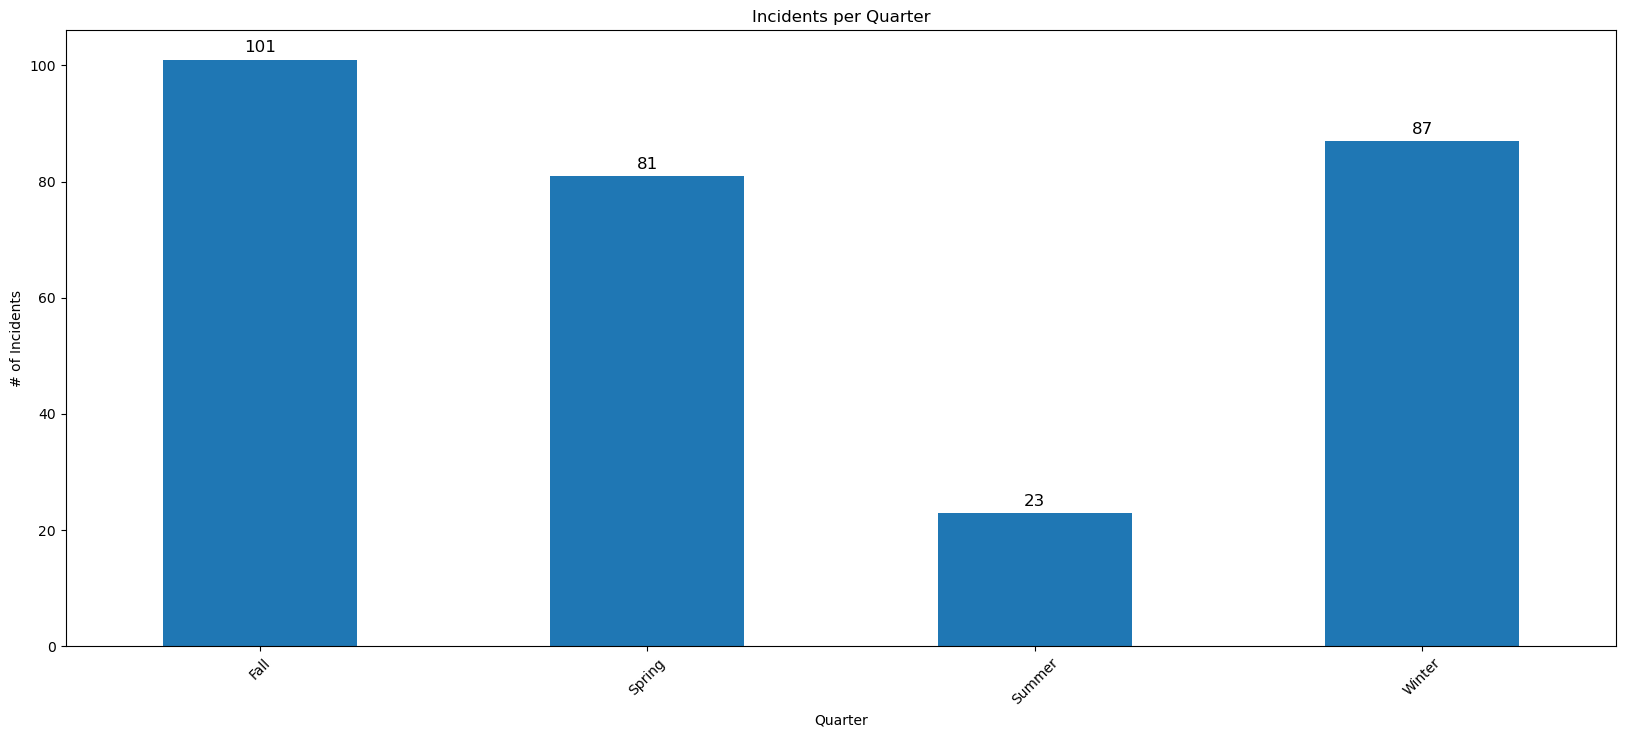

In [44]:
quarter_chart = count_quarter_incident.plot(kind="bar", figsize=(20,8))

#annotate bars with values
for container in quarter_chart.containers:
    quarter_chart.bar_label(container, label_type='edge', fontsize=12, padding=3)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("# of Incidents")
plt.title("Incidents per Quarter")

#save as png
plt.savefig('Outputs/map_plot_8.png')

#plot
plt.show()